# <center><font size = 3>

<span style="height:40px"> <p style="background-color:#9c0505;font-family:arial;color:#fff;font-size:150%;text-align:center;border-radius:10px 10px; height:40px;">INTRODUCTION</p>  
</span></font></center>

# We will use four different machine learning model

<ul>
    <li>
    XGB
    </li>
    <li>
    Catboost
    </li>
    <li>
    Light GBM
    </li>
    <li>Voting Classifier</li>
</ul>

Later we will add more machine learning models


# <center><font size = 3>

<span > <p style="background-color:#9c0505;font-family:arial;color:#fff;font-size:200%;text-align:center;border-radius:10px 10px;">Import Libs 📂</p>  
</span></font></center>


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LassoCV            
import plotly.express as px
from xgboost import XGBClassifier
import lightgbm as mlgbm
import catboost
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# <center><font size = 3>

<span > <p style="background-color:#9c0505;font-family:arial;color:#fff;font-size:200%;text-align:center;border-radius:10px 10px;">Let's perform EDA 💹📈📉📊</p>  
</span></font></center>


In [60]:
train_ds = pd.read_csv("s3e4/train.csv")
test_ds = pd.read_csv("s3e4/test.csv")
submmision_ds = pd.read_csv("s3e4/sample_submission.csv")
credits_ds = pd.read_csv("s3e4/creditcard.csv")

In [61]:
#train_ds = train_ds.drop('id', axis=1)


#  Let merge the cradit card data into the competition data

In [62]:
full =pd.concat([train_ds,credits_ds])

In [63]:
full.shape

(503936, 32)

In [64]:
credits_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
train_ds.head()


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [66]:
test_ds.head()


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [67]:
train_ds.describe()


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,...,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,109564.000000,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,...,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,63257.237906,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,...,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,...,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,54782.000000,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,...,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,109564.000000,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,...,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,164346.000000,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,...,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,219128.000000,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [68]:
train_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [69]:
train_ds=full

In [70]:
train_ds = train_ds.drop('id', axis=1)

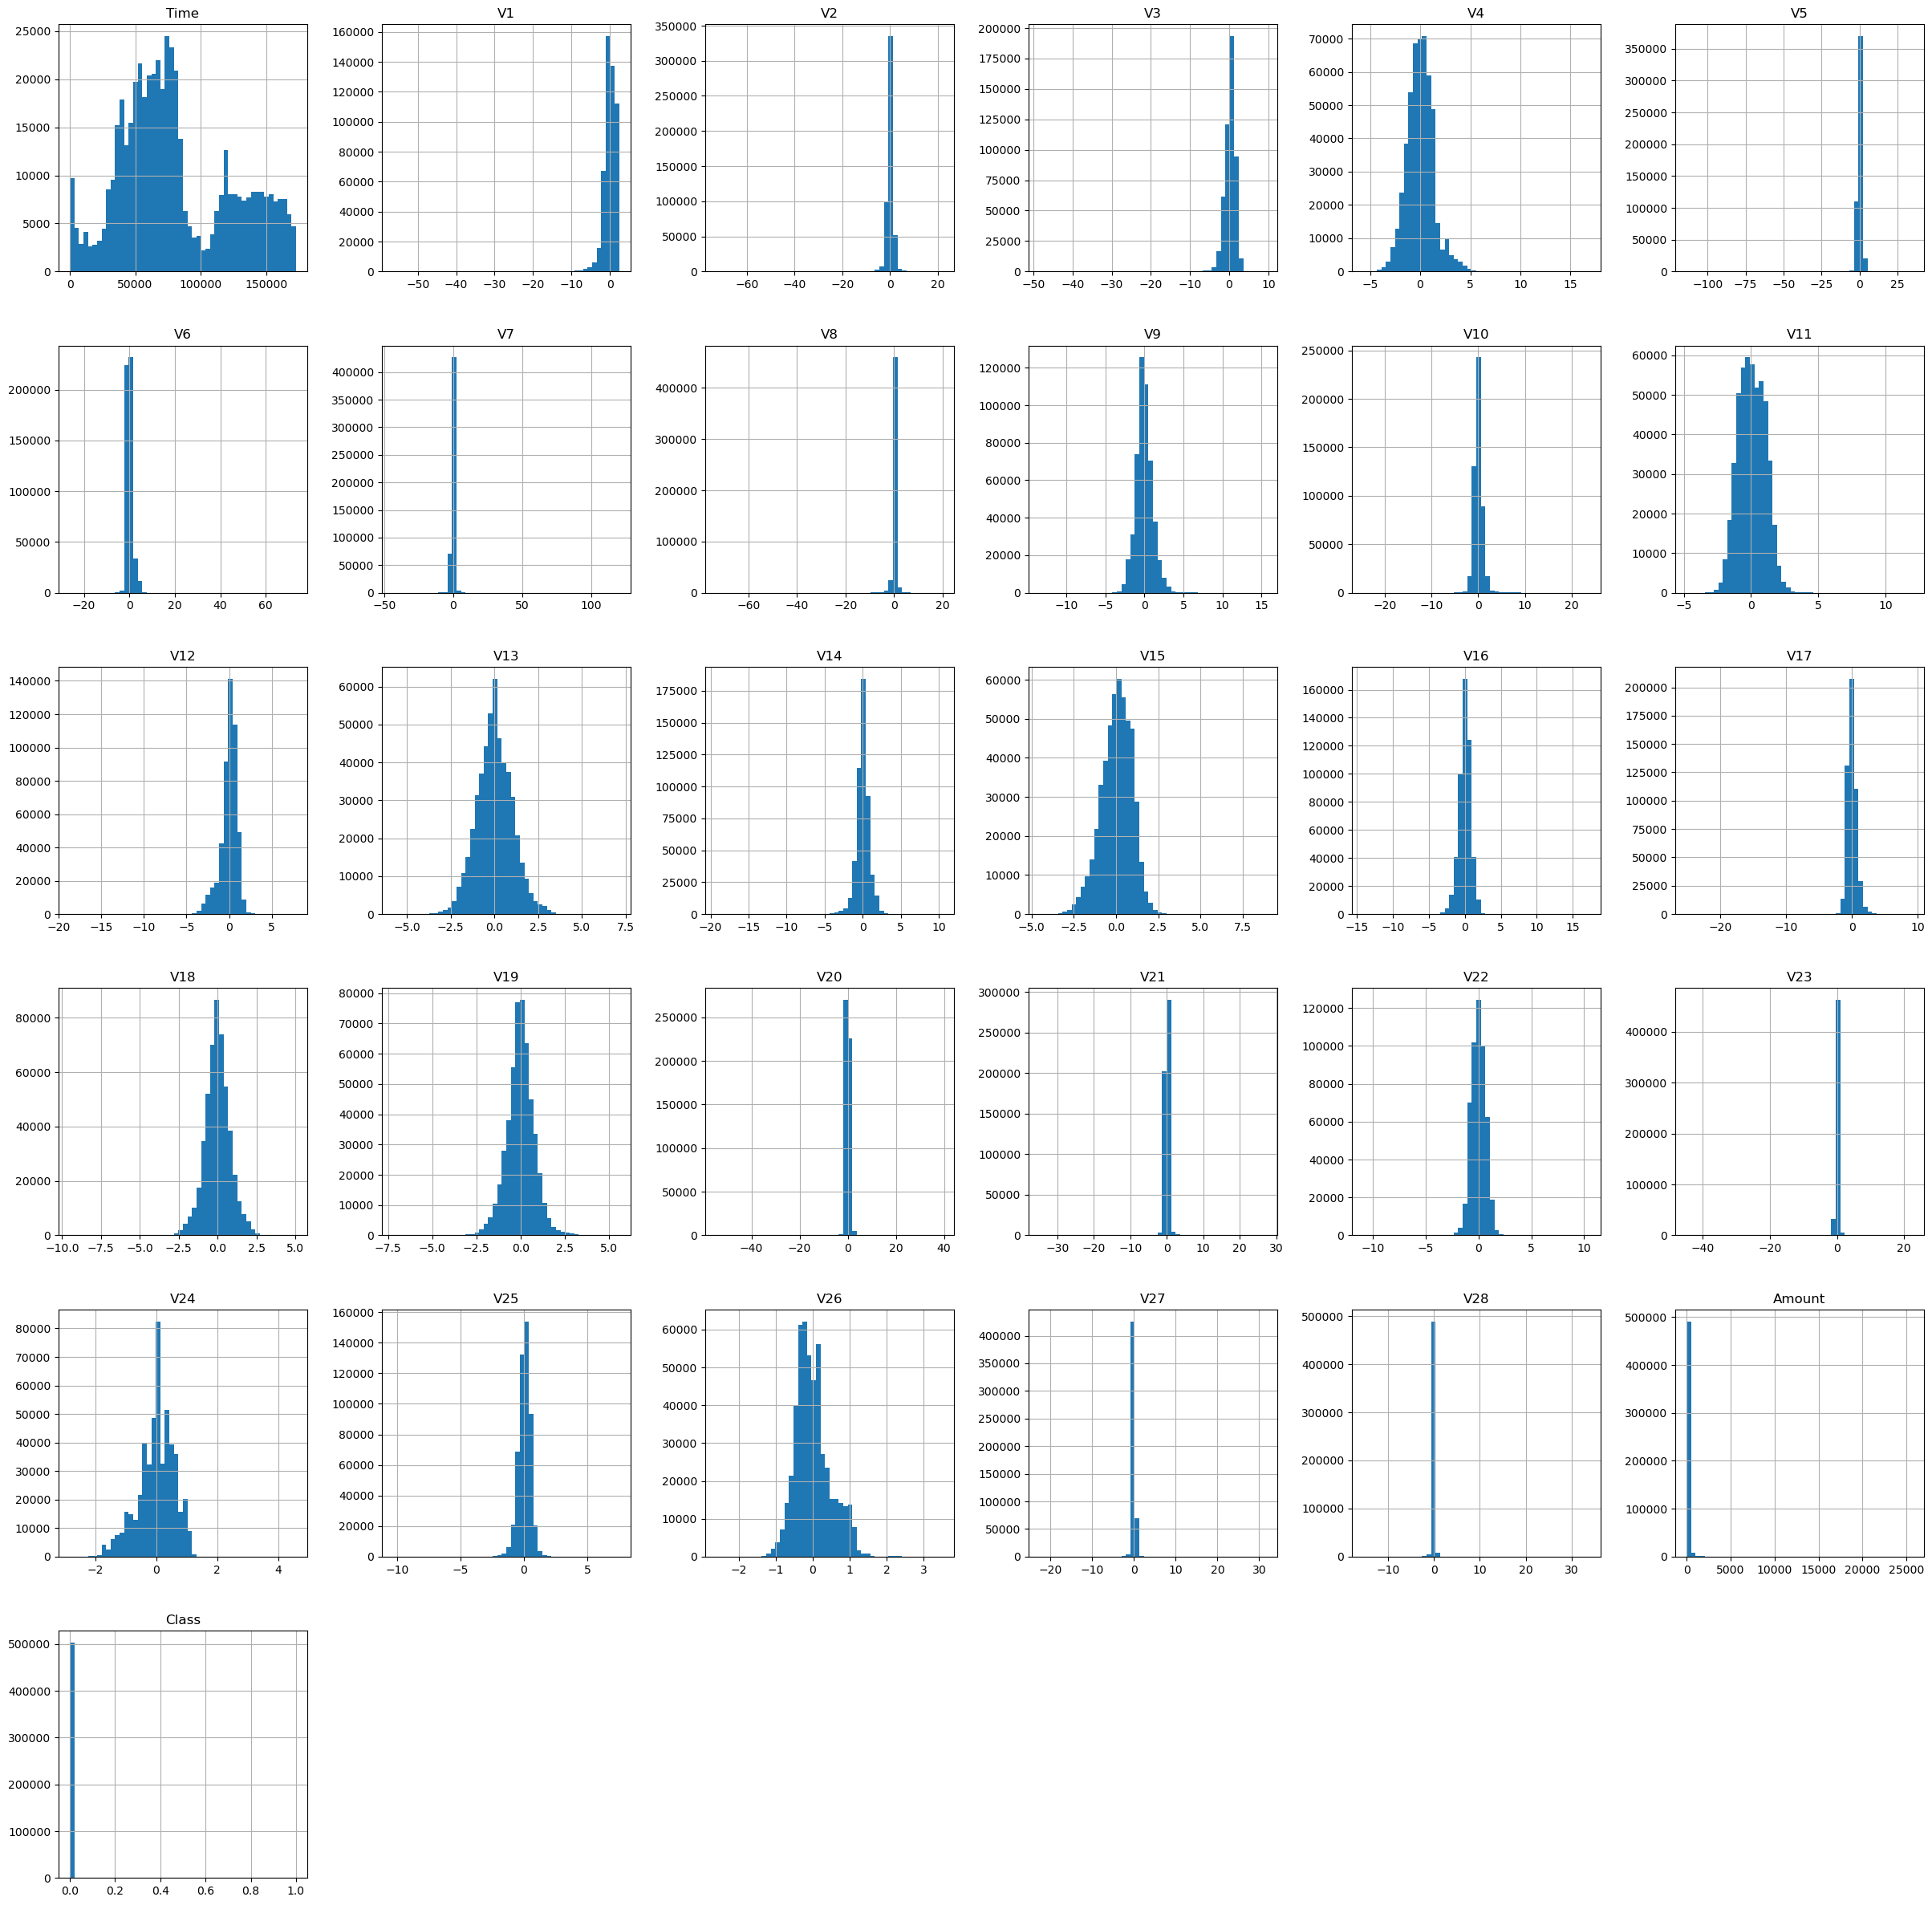

In [71]:
train_ds.hist(bins=50, figsize=(30, 30))
plt.show()


In [72]:
corr_matirx = train_ds.corr()

corr_matirx


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.077320,-0.010183,-0.412894,-0.090819,0.171574,-0.056082,0.093187,-0.057162,0.004862,...,0.049310,0.131406,0.062380,-0.013418,-0.237875,-0.041533,-0.011659,-0.023140,0.010300,-0.007244
V1,0.077320,1.000000,-0.083445,-0.061529,0.020354,-0.032129,0.026502,-0.057179,-0.021585,0.034205,...,-0.018716,-0.007260,-0.012340,-0.013581,0.079609,-0.000059,0.000263,0.009848,-0.200301,-0.075874
V2,-0.010183,-0.083445,1.000000,0.014166,0.047496,0.070658,-0.025896,0.075696,0.009671,0.003323,...,-0.018879,-0.010560,0.004046,0.001463,-0.042090,-0.013010,0.013973,0.002229,-0.538248,0.060248
V3,-0.412894,-0.061529,0.014166,1.000000,0.024734,-0.078110,-0.032369,0.001681,0.008716,-0.014729,...,0.000907,0.041276,-0.016908,-0.003411,-0.019009,0.005956,0.016211,0.009031,-0.198309,-0.132127
V4,-0.090819,0.020354,0.047496,0.024734,1.000000,-0.000027,-0.003197,0.028127,0.001039,0.055594,...,0.012522,0.018558,-0.003266,-0.019597,0.015100,-0.025756,-0.000243,0.006090,0.085247,0.087505
V5,0.171574,-0.032129,0.070658,-0.078110,-0.000027,1.000000,0.111831,0.076556,0.008709,0.001308,...,-0.012296,-0.031999,-0.003296,0.017459,-0.010610,-0.018445,0.003841,-0.010011,-0.360368,-0.052417
V6,-0.056082,0.026502,-0.025896,-0.032369,-0.003197,0.111831,1.000000,-0.075328,0.082715,0.023796,...,0.001242,-0.007472,-0.009468,0.030890,0.042540,0.001242,0.006255,0.003618,0.168854,-0.026036
V7,0.093187,-0.057179,0.075696,0.001681,0.028127,0.076556,-0.075328,1.000000,-0.036055,-0.012695,...,-0.001643,-0.021281,-0.006856,-0.003462,-0.045601,-0.011071,-0.008979,0.001422,0.349506,-0.124611
V8,-0.057162,-0.021585,0.009671,0.008716,0.001039,0.008709,0.082715,-0.036055,1.000000,0.001162,...,-0.000573,0.002770,-0.000314,0.010666,0.004147,0.004218,0.007526,0.004443,-0.101524,0.000645
V9,0.004862,0.034205,0.003323,-0.014729,0.055594,0.001308,0.023796,-0.012695,0.001162,1.000000,...,-0.002828,0.020709,0.004661,-0.003122,0.002214,0.032726,0.002124,-0.014397,-0.035581,-0.046804


# Graphs


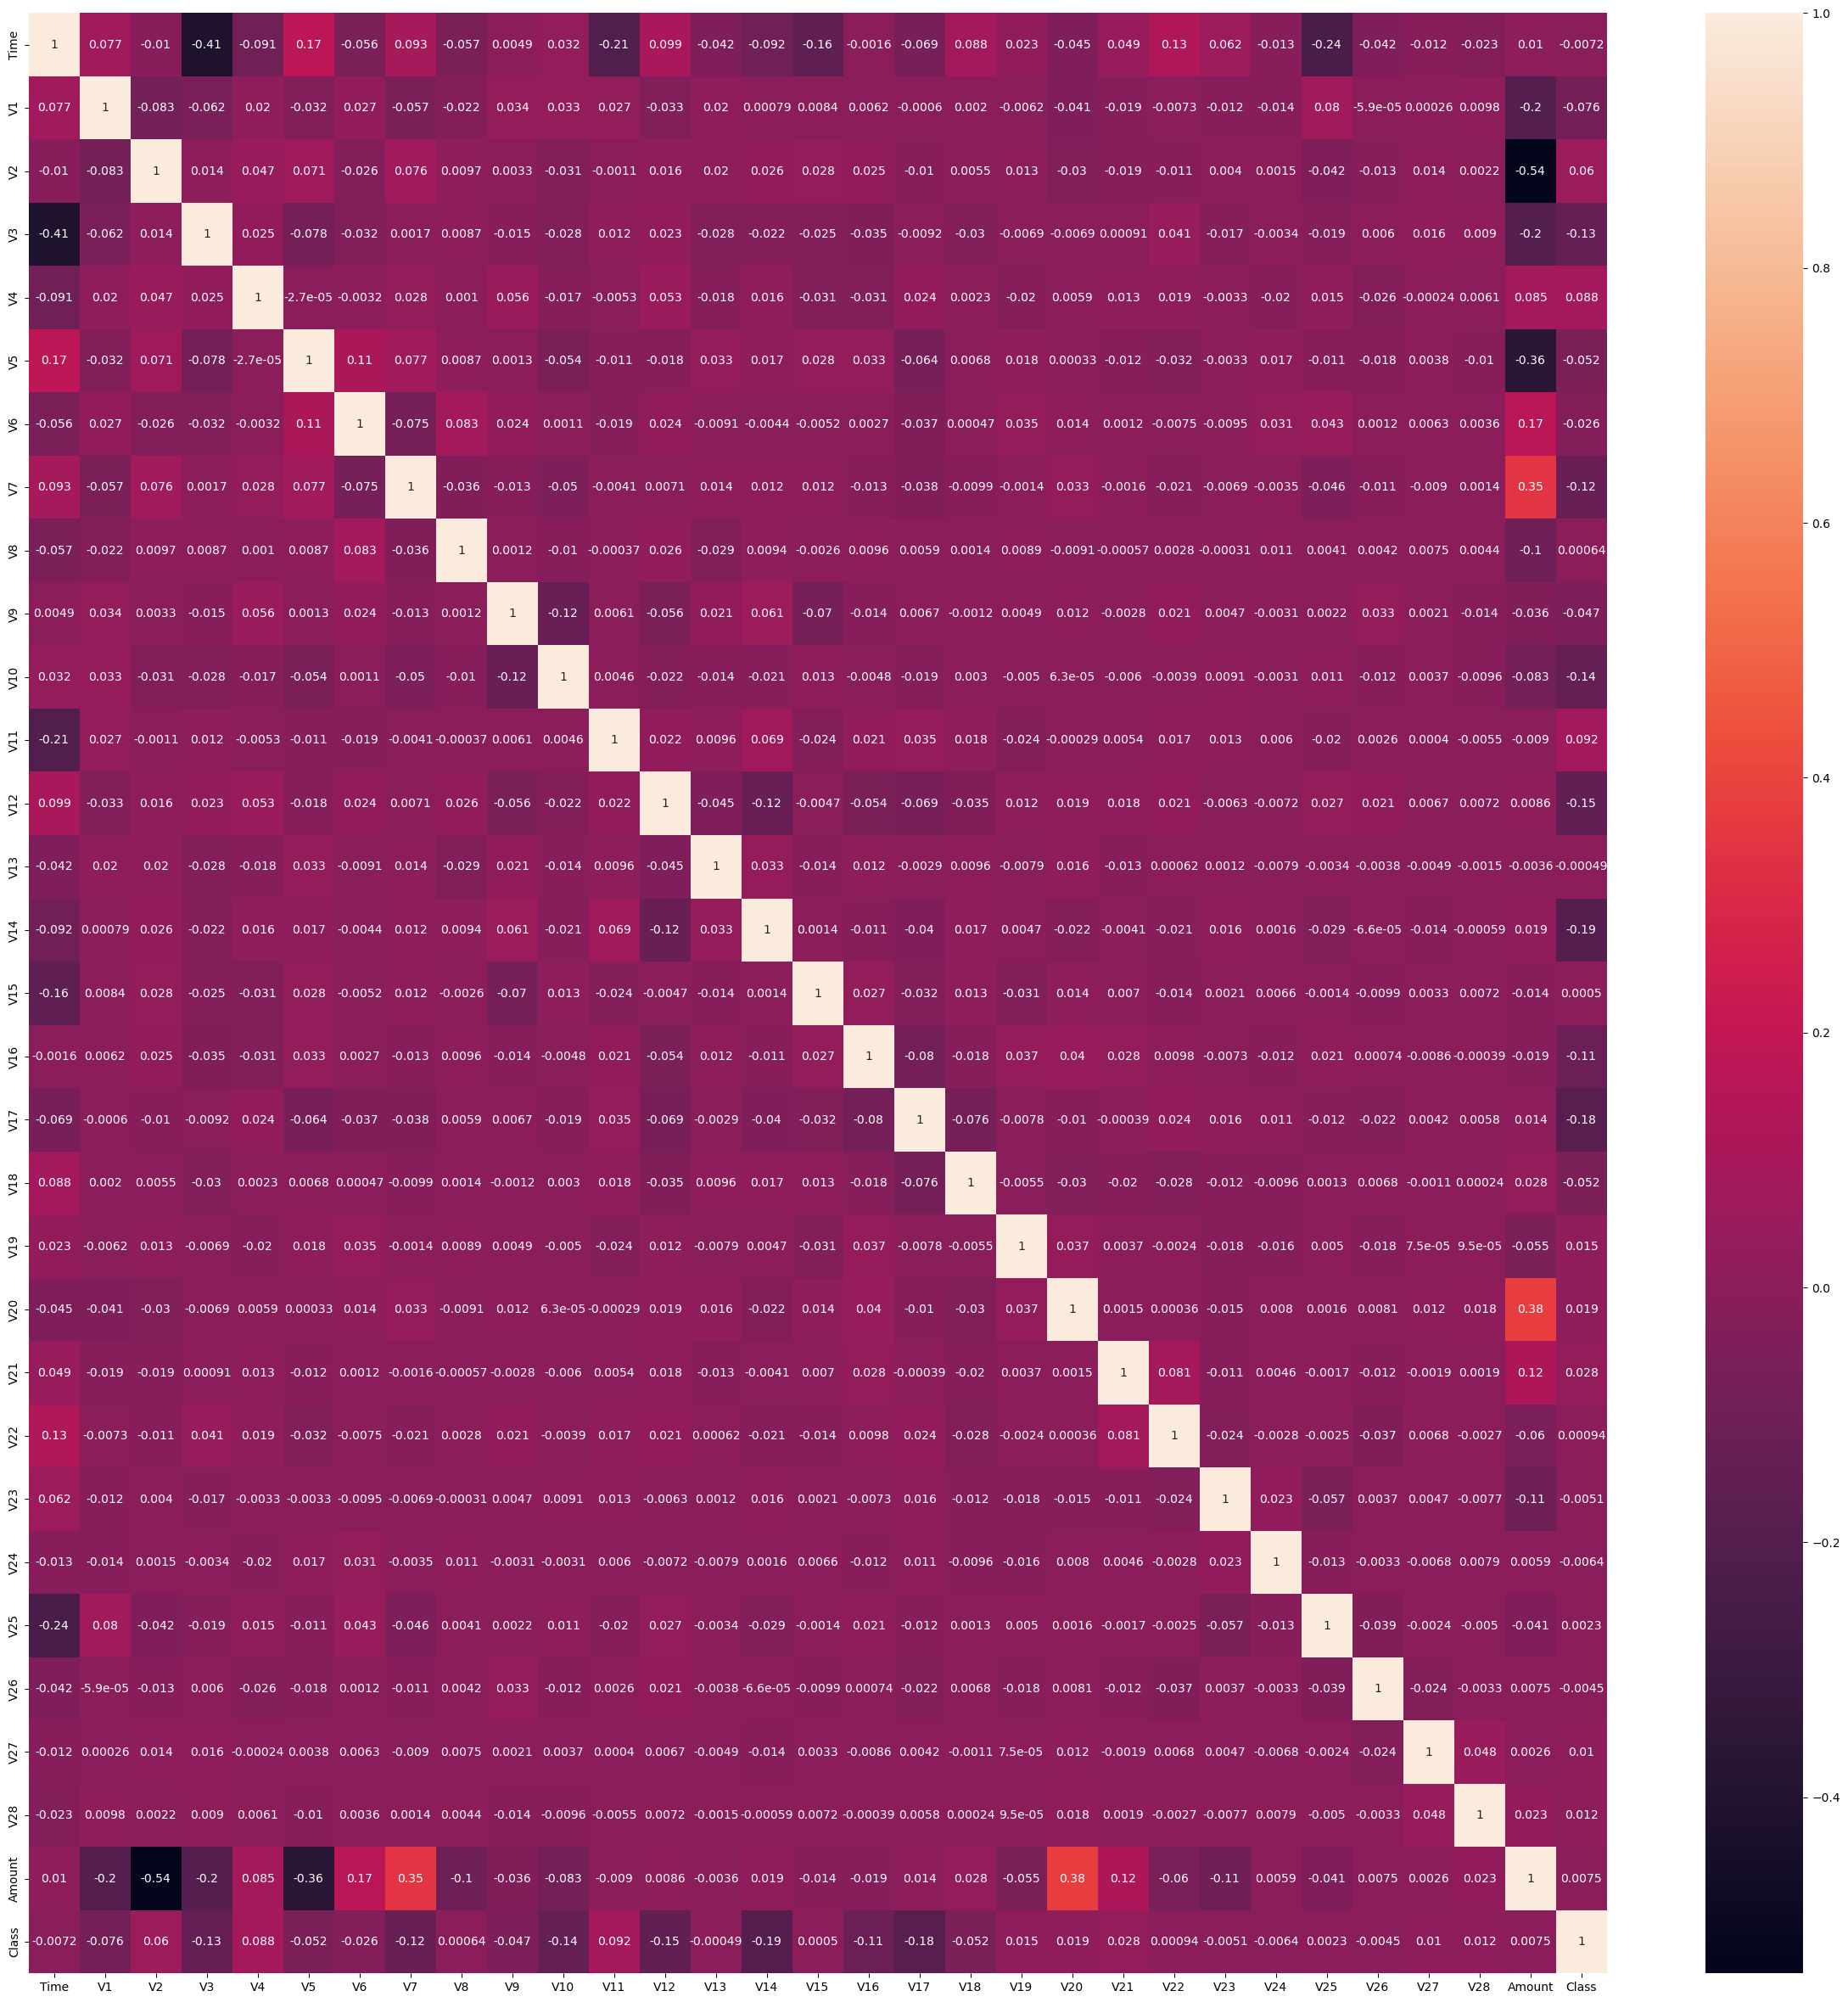

In [73]:
# correlation plot
fig = plt.figure(figsize=(30, 30))
sns.heatmap(corr_matirx, annot=True)
plt.show()


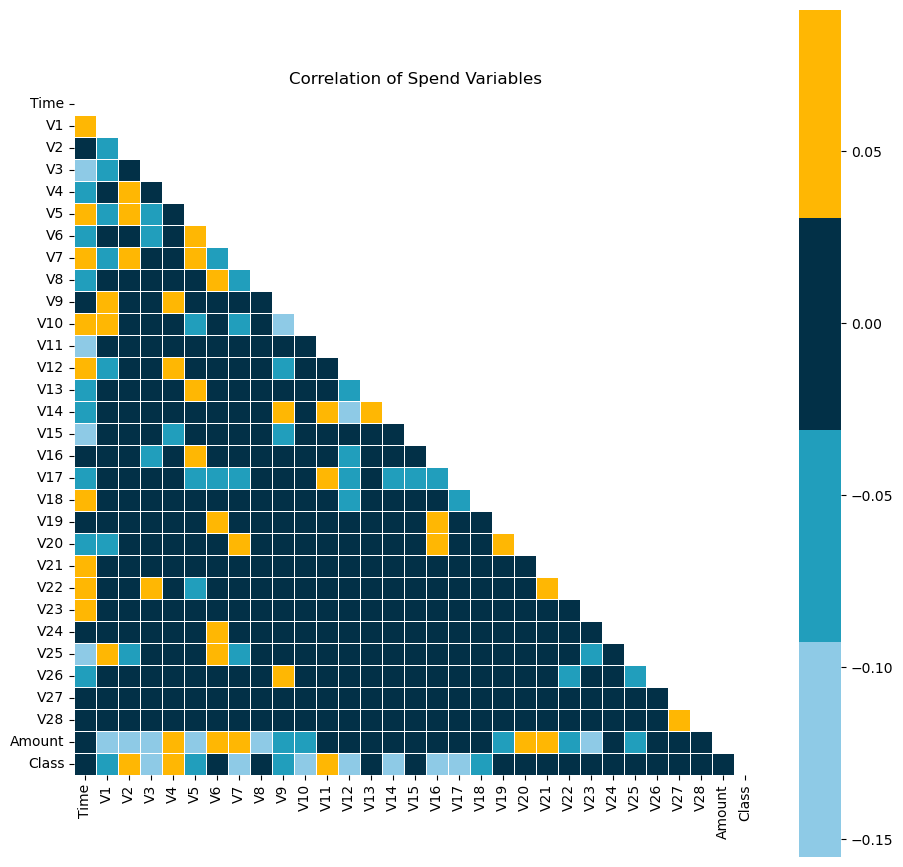

In [74]:
plt.figure(figsize=(11, 11))

mask = np.triu(np.ones_like(corr_matirx, dtype=bool))
sns.heatmap(corr_matirx, mask=mask, robust=True, center=0, square=True, cmap=[
            "#8ecae6", "#219ebc", "#023047", "#ffb703", "#fb8500"], linewidths=.6)
plt.title('Correlation of Spend Variables')
plt.show()


# <center><font size = 3>

<span > <p style="background-color:#9c0505;font-family:arial;color:#fff;font-size:200%;text-align:center;border-radius:10px 10px;">DATA PREPARATION 🤵💼</p>  
</span></font></center>


In [75]:
# train_ds['houe']=train_ds['Time'] % (24*3600)//3600
# train_ds['day']=train_ds['Time'] % (24*3600)//3600

# test_ds['houe']=test_ds['Time'] % (24*3600)//3600
# test_ds['day']=test_ds['Time'] % (24*3600)//3600


In [76]:
# def across_col_feat(df):
#     '''
#     Calculates features across colums...
#     '''
#     features = [feat for feat in df.columns if 'V' in feat]
#     df['V_Sum'] = df[features].sum(axis = 1)
#     df['V_Min'] = df[features].min(axis = 1)
#     df['V_Max'] = df[features].max(axis = 1)
#     df['V_Avg'] = df[features].mean(axis = 1)
#     df['V_Std'] = df[features].std(axis = 1)
#     df['V_Pos'] = df[features].gt(0).sum(axis = 1)
#     df['V_Neg'] = df[features].lt(0).sum(axis = 1)
#     df['V_Range'] = abs(df['V_Min'] - df['V_Max'])

#     return df

# df = across_col_feat(train_ds)
# test_ds = across_col_feat(test_ds)

In [77]:
# train_ds=df

In [78]:
# from sklearn.preprocessing import RobustScaler
# rscale = RobustScaler()

# y = train_ds['Class']
# train_ds = train_ds.drop(['Class'], axis=1)

# # df['Amount']=rscale.fit_transform(df['Amount'].values.reshape(-1,1))
# # df['Time']=rscale.fit_transform(df['Time'].values.reshape(-1,1))

# train_ds[train_ds.columns] = rscale.fit_transform(train_ds[train_ds.columns])


In [79]:
# test_ds[test_ds.columns] = rscale.fit_transform(test_ds[test_ds.columns])

In [ ]:
# train_df = train_ds.iloc[:-len(test_ds),:]
# train_df['Class'] = y[:-len(test_ds)]
# test_df = train_ds.iloc[-len(test_ds):,:].reset_index(drop=True)

# oversample = train_df[train_df['Class']==1]
# undersample = train_df[train_df['Class']==0]

# X = train_df.drop(['Class'], axis=1)
# y = train_df.Class
# X_test = test_df

In [ ]:
# train_ds = train_ds.drop('Time', axis=1)
# test_ds = test_ds.drop('Time', axis=1)


In [80]:
# X_train = train_ds
# X_test = test_ds.drop('id', axis=1)
# y = y


In [81]:
X_train = train_ds.drop('Class', axis=1)
X_test = test_ds.drop('id', axis=1)
y = train_ds['Class']


In [82]:
X_train.shape, X_test.shape, y.shape


((503936, 40), (146087, 40), (503936,))

# <center><font size = 3>

<span > <p style="background-color:#9c0505;font-family:arial;color:#fff;font-size:200%;text-align:center;border-radius:10px 10px;">Feature Scaling 🏋️‍♂️🛠️</p>  
</span></font></center>


In [83]:
scaler = StandardScaler()
#X_train = scaler.fit_transform(X=X_train)
X_test = scaler.fit_transform(X=X_test)


# <center><font size = 3>

<span > <p style="background-color:#9c0505;font-family:arial;color:#fff;font-size:200%;text-align:center;border-radius:10px 10px;">Model🛠️</p>  
</span></font></center>


<a id="4.1"></a>

<p style="background-color:#1d3557;font-family:newtimeroman;color:#f1faee;font-size:140%;text-align:center;border-radius:200px 10px;">XGB</p>


In [84]:
xgb_clf = XGBClassifier(n_estimators=200, max_depth=2, learning_rate=0.1)
#xgb_clf.fit(X_train,y)


# Training XGB using stratified cross-validation

In [85]:
def score(clf, x, y):
    return roc_auc_score(y, clf.predict_proba(x)[:,1])

In [86]:
xgb_preds = []
xgb_val_preds = []
scores = []
kfold= StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
for train_index, test_index in kfold.split(X_train,y=y):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]    
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
    x_train= scaler.fit_transform(X=x_train)
    x_test=scaler.fit_transform(X=x_test)
    param_grid = {'n_estimators': [100, 150],
              'max_depth': [1, 2],
              'learning_rate': [0.1, 0.01],
              'min_child_weight': [3, 4],
              'subsample': [0.6, 0.7],
              'colsample_bytree': [0.2, 0.3]
             }
    RS = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_grid,
                             scoring=score, n_jobs=-1, n_iter=5, cv=5, random_state=42)
    RS.fit(x_train, y_train)
    xgb = XGBClassifier(**RS.best_params_)
    xgb.fit(x_train, y_train)
    xgb_preds.append(xgb.predict_proba(X_test)[:,1])
    xgb_val_preds.append(xgb.predict_proba(X_train)[:,1])
    print(str(score(xgb,x_train, y_train)) + "    " + str(score(xgb,x_test, y_test)))
    scores.append(score(xgb,x_test, y_test))
    

c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:27:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9165579315885011    0.8618002331106605


c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:29:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.914273975876916    0.901632727278752


c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8813362527078955    0.9036165288215569


c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:32:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8849915763158003    0.8620767103065728


c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:34:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8879004132653581    0.8967682818733681


c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8897514511582347    0.8554923957875784


c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.907488899649656    0.9148521324996188


c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8863647556441695    0.8697201125315626


c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8847024810372551    0.890593830977328


c:\Users\Dharmesh\.conda\envs\kaggel\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:42:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8840413710601932    0.859673849831998


In [87]:
np.mean(scores) # previous 0.8072632457404122

0.8816226803018996

<a id="4.1"></a>

<p style="background-color:#1d3557;font-family:newtimeroman;color:#f1faee;font-size:140%;text-align:center;border-radius:200px 10px;">LightGBM</p>


In [88]:
lgbm_params = {'bagging_fraction': (0.5, 0.8),
                'bagging_frequency': (5, 8),
                'feature_fraction': (0.5, 0.8),
                'max_depth': (10, 13),
                'min_data_in_leaf': (90, 120),
                'num_leaves': (1200, 1550)}
lgbm_clf = mlgbm.LGBMClassifier(**lgbm_params)
#lgbm_clf.fit(X_train, y, verbose=False)


# Training LightGBM using stratified cross-validation

In [89]:
lgbm_preds = []
lgbm_val_preds = []
scores = []

for train_index, test_index in kfold.split(X_train,y=y):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]    
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
    x_train= scaler.fit_transform(X=x_train)
    x_test=scaler.fit_transform(X=x_test)
    RS = RandomizedSearchCV(estimator=lgbm_clf, param_distributions=lgbm_params,
                             scoring=score, n_jobs=-1, n_iter=5, cv=5, random_state=42)
    RS.fit(x_train, y_train)
    lgbm = mlgbm.LGBMClassifier(**RS.best_params_)
    lgbm.fit(x_train, y_train)
    lgbm_preds.append(lgbm.predict_proba(X_test)[:,1])
    lgbm_val_preds.append(lgbm.predict_proba(X_train)[:,1])
    print(str(score(lgbm,x_train, y_train)) + "    " + str(score(lgbm,x_test, y_test)))
    scores.append(score(lgbm,x_test, y_test))
    

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
1.0    0.8717711191299853
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
0.9769503963454604    0.7079506143385423
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_frac

<a id="4.1"></a>

<p style="background-color:#1d3557;font-family:newtimeroman;color:#f1faee;font-size:140%;text-align:center;border-radius:200px 10px;">CatBoost</p>


In [ ]:
# catboost_params = {'loss_function': 'CrossEntropy',
#                      'boosting_type': 'Plain',
#                      'bootstrap_type': 'Bernoulli',
#                     }

catboost_params={'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}

catboost_clf = catboost.CatBoostClassifier(**catboost_params)
#catboost_clf.fit(X_train, y, verbose=False)

In [ ]:
cat_preds = []
cat_val_preds = []
scores = []

for train_index, test_index in kfold.split(X_train,y=y):
    x_train, x_test = X_train[train_index], X_train[test_index]    
    y_train, y_test = y[train_index], y[test_index]    
    
    RS = RandomizedSearchCV(estimator=catboost_clf, param_distributions=catboost_params,
                             scoring=score, n_jobs=-1, n_iter=5, cv=5, random_state=42)
    RS.fit(x_train, y_train)
    cat = catboost.CatBoostClassifier(**RS.best_params_)
    cat.fit(x_train, y_train)
    cat_preds.append(cat.predict_proba(X_test)[:,1])
    cat_val_preds.append(cat.predict_proba(X_train)[:,1])
    print(str(score(cat,x_train, y_train)) + "    " + str(score(cat,x_test, y_test)))
    scores.append(score(cat,x_test, y_test))


In [ ]:
# test_df = pd.read_csv("s3e4/test.csv")

In [ ]:
# for clf in clfs:
#     preds = clf.predict_proba(test_df[feats].values)
#     y_pred.append(preds[:, 1])

In [ ]:
# y_pred = np.stack(y_pred).mean(0)
# y_pred

In [ ]:
# df_subm = pd.DataFrame(data={'id': test_df.id, 'Class': y_pred})
# df_subm

In [ ]:
# df_subm.to_csv('subm_catboost.csv', index=False)

<a id="4.1"></a>

<p style="background-color:#1d3557;font-family:newtimeroman;color:#f1faee;font-size:140%;text-align:center;border-radius:200px 10px;">Other models</p>


In [ ]:
log_clf = LogisticRegression()
rand_clf = RandomForestClassifier()
svm_clf = SVC()


In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('xgbclf', xgb_clf),
        ('lgbm', lgbm_clf),
        ('ctb', catboost_clf),
        ('lr', log_clf),
        ('rf', rand_clf),
        ('svc', svm_clf)
    ]

)


In [ ]:
#voting_clf.fit(X_train, y)


In [ ]:
pred=voting_clf.predict(X_test)

# <center><font size = 3>

<span > <p style="background-color:#9c0505;font-family:arial;color:#fff;font-size:200%;text-align:center;border-radius:10px 10px;">Submission ✅</p>  
</span></font></center>


In [93]:
sub=pd.read_csv("s3e4/test.csv")

In [94]:
submission=pd.DataFrame({"id":sub.id,"Class":pred})
submission.to_csv("submission.csv",index=False)
submission.head()

NameError: name 'pred' is not defined

# use only top three model 

In [ ]:
xgb_preds = xgb_clf.predict_proba(X_test)[:, 1]
lgbm_preds = lgbm_clf.predict_proba(X_test)[:, 1]
cat_preds = catboost_clf.predict_proba(X_test)[:, 1]
final_preds = np.column_stack([xgb_preds, lgbm_preds, cat_preds]).mean(axis=1)

In [ ]:
submission = pd.DataFrame({"id": sub.id, "Class": final_preds})
submission.to_csv("submission.csv", index=False)
submission.head()

In [ ]:
# cat_preds = catboost_clf.predict_proba(X_test)[:, 1]

In [ ]:
# submission = pd.DataFrame({"id": sub.id, "Class": cat_preds})
# submission.to_csv("submission.csv", index=False)
# submission.head()

# Check cross validation with Grid Search tuning parameters

In [90]:
#val_preds = (np.mean(xgb_val_preds,axis=0)+np.mean(lgbm_val_preds,axis=0))/2
val_preds = (np.average(xgb_val_preds,axis=0)*0.24+np.average(lgbm_val_preds,axis=0)*0.24)
roc_auc_score(y,val_preds)

0.9344347997262284

In [91]:
preds = (np.mean(xgb_preds,axis=0)+ np.mean(lgbm_preds,axis=0))/2

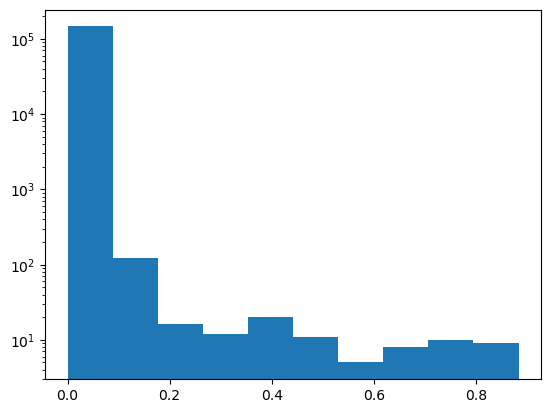

In [92]:
plt.hist(preds,log=True);

In [95]:
submission = pd.DataFrame({"id": sub.id, "Class": preds})
submission.to_csv("submission_with cross validation and grid search_1.csv", index=False)
submission.head()

,id,Class
0,219129,0.000665
1,219130,0.001219
2,219131,0.000313
3,219132,0.000510
4,219133,0.000579
